<a href="https://colab.research.google.com/github/reflectormensah/Financial-Engineering-Data-Science/blob/main/Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install nsepy

  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36057 sha256=2c022a5ec61b50125b9d9492acb4607f8b00b25da865d8c7ff7614cd7b305a79
  Stored in directory: /root/.cache/pip/wheels/4c/87/cb/acaf83f625e5fc73e1fe6e2a8e97680c74cd72391850ef5a86
Successfully built nsepy


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime as dt
import yfinance as yf
import nsepy
from statistics import mean

In [ ]:
# get daily data from yfinance
def get_daily_data(symbol, start, end):
    data = yf.download(tickers=symbol, start=start, end=end)
    # data = nsepy.get_history(symbol=symbol, start=start, end=end)
    return data

# moving averages strategy on close price data
# [!] implement any strategy you like across all stocks in your portfolio
def ma(data,ma1,ma2):
    # calculating moving averages
    data['ma_short'] = data['Close'].ewm(span=ma1).mean().shift()
    data['ma_long'] = data['Close'].ewm(span=ma2).mean().shift()

    # creating positions
    # data["position"] = [0]*len(data)
    data['position'] = np.where(data["ma_short"] > data["ma_long"], 1, 0)
    data["strategy_returns"] = data["bnh_returns"] * data["position"]

    # returning strategy returns
    return data["strategy_returns"]

# Cumulative returns fucntion
def get_cumulative_return(df):
    return list(df.cumsum())[-1]

#  Annualized sharpe ratio function
def get_annualized_sharpe_ratio(df):
    return 252**(1/2) * (df.mean() / df.std())

In [ ]:
# backtesting parameters
days = 2000
end = dt.today()
start = end - pd.Timedelta(days=days)

# portfolio of stocks
portfolio_stocks = ["AAPL", "AMZN", "GOOGL", "MSFT", "TM",]

# defining a data frame to store portfolio returns
portfolio_strategy_returns = pd.DataFrame()
portfolio_bnh_returns = pd.DataFrame()

# buy and hold returns for individual stocs
bnh_stock_returns = []
bnh_stock_sharpe = []

# iterating over stocks in the portfolio
for stock in portfolio_stocks:
    data = get_daily_data(stock, start, end)

    # Calcuulating daily returns
    data["bnh_returns"] = np.log(data["Close"]/data["Close"].shift())

    portfolio_strategy_returns[stock] = ma(data,ma1 = 3, ma2 = 8)

    bnh_stock_returns.append(get_cumulative_return(data["strategy_returns"]))
    bnh_stock_sharpe.append(get_annualized_sharpe_ratio(data["strategy_returns"]))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
print("\nSTRATEGY RETURNS ON PORTFOLIO")
portfolio_strategy_returns["Portfolio_rets"] = portfolio_strategy_returns.mean(axis=1)
portfolio_strategy_returns.round(decimals = 4).head(10)


STRATEGY RETURNS ON PORTFOLIO


,AAPL,AMZN,GOOGL,MSFT,TM,Portfolio_rets
Date,,,,,,
2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000
2018-09-25,0.0063,0.0206,0.0121,-0.0019,0.0000,0.0074
2018-09-26,-0.0080,0.0002,0.0001,-0.0041,0.0021,-0.0019
2018-09-27,0.0203,0.0191,0.0111,0.0000,-0.0042,0.0093
2018-09-28,0.0035,-0.0050,-0.0002,-0.0000,-0.0021,-0.0008
2018-10-01,0.0067,0.0007,0.0012,0.0000,0.0000,0.0017
2018-10-02,0.0088,-0.0166,-0.0007,-0.0040,0.0071,-0.0011
2018-10-03,0.0121,-0.0095,0.0032,0.0002,-0.0242,-0.0036


In [ ]:
perf = pd.DataFrame(index=portfolio_stocks,columns=["Cumulative returns","Annualized Sharpe Ratio"])

for i,stock in enumerate(portfolio_stocks):
    cum_ret = bnh_stock_returns[i]
    anu_shp = bnh_stock_sharpe[i]
    perf.loc[stock] = [cum_ret,anu_shp]

perf

,Cumulative returns,Annualized Sharpe Ratio
AAPL,1.336599,1.192167
AMZN,0.370953,0.292204
GOOGL,-0.405078,-0.341523
MSFT,0.475102,0.442875
TM,0.279831,0.320428


In [ ]:
perf.mean()

print("Cumulative returns MA Stretegy                  :",get_cumulative_return(portfolio_strategy_returns["Portfolio_rets"]))
print("Annualized sharpe ratio MA Strategy             :",get_annualized_sharpe_ratio(portfolio_strategy_returns["Portfolio_rets"]))
print("\n")

Cumulative returns MA Stretegy                  : 0.411481450847683
Annualized sharpe ratio MA Strategy             : 0.5267914595587025




<Axes: title={'center': 'MOVING AVERAGES STRATEGY CUMULATIVE RETURNS'}, xlabel='Date'>

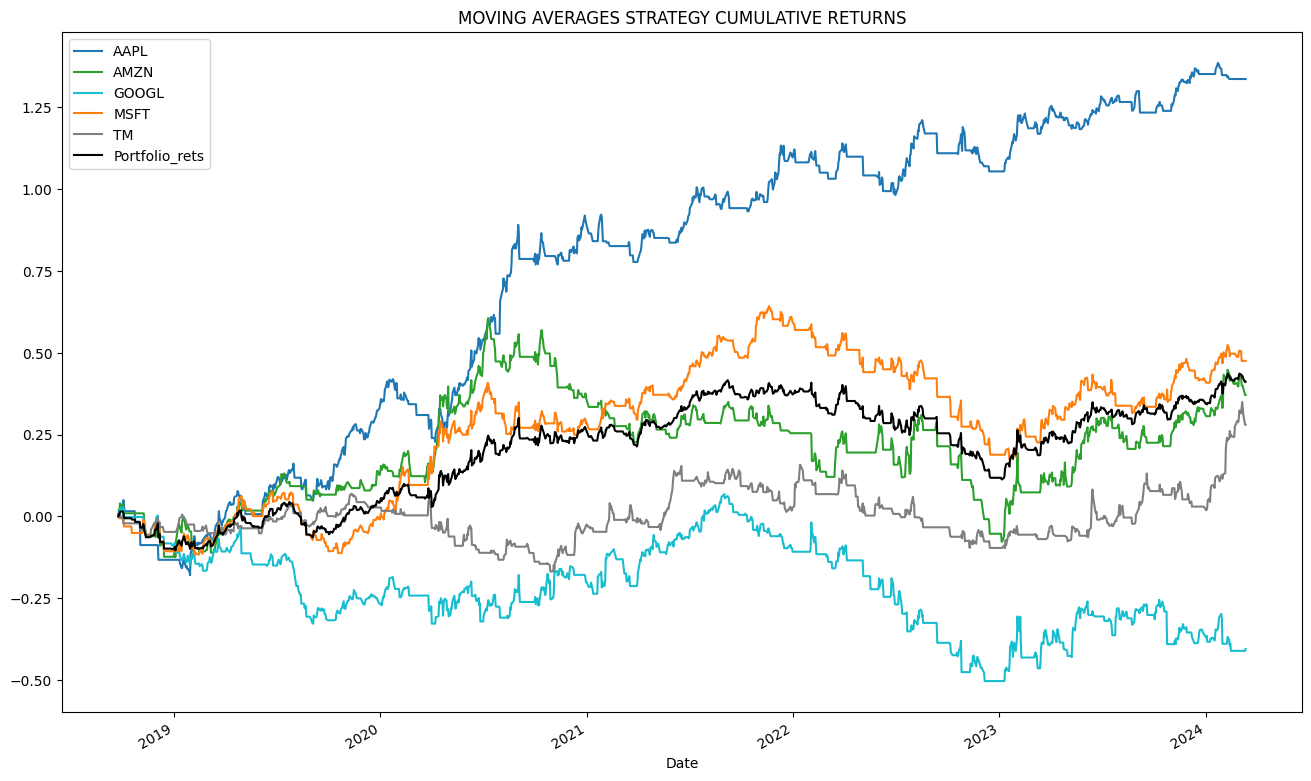

In [ ]:
colors = ['tab:blue','tab:green','tab:cyan','tab:orange','tab:gray',"k"]
portfolio_strategy_returns.cumsum().plot(figsize=(16,10), title="MOVING AVERAGES STRATEGY CUMULATIVE RETURNS", color=colors)


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List of stock symbols
symbols = ["MSFT", "TM", "AMZN", "AAPL", "GOOGL"]

# Define the date range
start_date = "2014-01-01"
end_date = "2018-01-01"

# Download historical data
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
returns = np.log(1 + data.pct_change().dropna())

# Number of assets
n_assets = len(symbols)

da

[*********************100%%**********************]  5 of 5 completed


In [ ]:
data

Ticker,AAPL,AMZN,GOOGL,MSFT,TM
Date,,,,,
2014-01-02,17.296658,19.898500,27.855856,31.233065,110.172951
2014-01-03,16.916723,19.822001,27.652653,31.022932,110.063354
2014-01-06,17.008970,19.681499,27.960960,30.367338,109.752838
2014-01-07,16.887327,19.901501,28.500000,30.602686,110.017700
2014-01-08,16.994267,20.096001,28.559309,30.056355,109.460564
...,...,...,...,...,...
2017-12-22,41.320259,58.417999,53.443001,79.670975,128.320007
2017-12-26,40.271961,58.838001,53.292500,79.568459,127.980003
2017-12-27,40.279053,59.112999,53.009998,79.857292,128.229996
